## Movie Hypothesis Test

For this assignment, I will test if there is actually any significance between the mean of all of the movies verses the mean of just the animation movies.

Here are my null and alternative hypotheses:

$H_0$ = There is no statistical difference between the two groups.

$H_1$ = There is a statistical difference between the two groups.

I will first import the data and create the first data frame:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#Imported the data
movie_metadata = pd.read_csv('movie_metadata.csv')

#This is how I got rid of the foreign currency. I removed any budget of $300,000,000.00
movie_metadata = movie_metadata.loc[movie_metadata.budget < 300000000] 

#Created a new "net" column from the gross - budget
result = movie_metadata.gross - movie_metadata.budget
movie_metadata['net'] = result

movie_metadata.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,net
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


Now, I will index out the net data for each group:

In [3]:
movie_metadata_net_array = np.asarray(movie_metadata.net.dropna())

In [4]:
def genre_histogram(genre):
    temp_df = movie_metadata.loc[movie_metadata.genres.str.contains(genre)]
    temp_df_net = temp_df.gross - temp_df.budget
    temp_df['net'] = temp_df_net
    return temp_df.net.dropna()

In [5]:
import warnings
warnings.filterwarnings('ignore')

animation_df = genre_histogram("Animation")

Below is a plot of the overlaid histograms of both data sets:

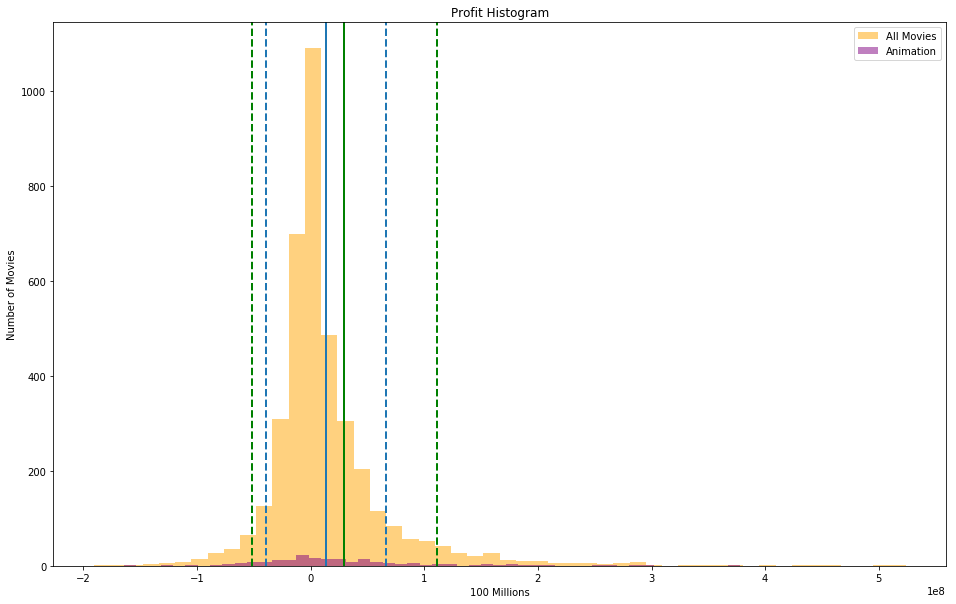

All Movies Mean = 13385285.7897
Animation Mean = 29649201.852
Difference = 16263916.0623


In [6]:
plt.figure(figsize=(16,10))
plt.hist(movie_metadata_net_array, color="Orange", bins=50, alpha=0.5, label='All Movies')

plt.axvline(movie_metadata_net_array.mean(), linestyle='solid', linewidth=2)
plt.axvline(movie_metadata_net_array.mean() + movie_metadata_net_array.std(ddof=1), 
            linestyle='dashed', linewidth=2)
plt.axvline(movie_metadata_net_array.mean()- movie_metadata_net_array.std(ddof=1), 
            linestyle='dashed', linewidth=2) 

plt.hist(animation_df, color="Purple", bins=50, alpha=0.5, label='Animation')
plt.axvline(animation_df.mean(), linestyle='solid', linewidth=2, color="Green")
plt.axvline(animation_df.mean() + animation_df.std(ddof=1), 
            linestyle='dashed', linewidth=2, color="Green")
plt.axvline(animation_df.mean()- animation_df.std(ddof=1), 
            linestyle='dashed', linewidth=2, color="Green") 

plt.ylabel('Number of Movies')
plt.xlabel('100 Millions')
plt.title('Profit Histogram')

plt.legend(loc='upper right')

plt.show()
print('All Movies Mean = ' + str(movie_metadata_net_array.mean()))
print('Animation Mean = ' + str(animation_df.mean()))
print('Difference = ' + str(animation_df.mean()-movie_metadata_net_array.mean()))

As you can see, the mean for all movies is 13,385,285.79 while the animation mean is 29,649,201.85 for a difference of 16,263,916.06. 

That seems like quite a big difference. But, as you can see from plot, the two groups vary greatly in size. Will that factor into the validity of the null hypothesis?

I will now run a function to get the t-value and p-value:

In [7]:
tval,pval=stats.ttest_ind(animation_df, movie_metadata_net_array, equal_var=False)
print(tval, pval)

2.76677563145 0.00618307869214


For my own leanring, I will also attempt to "manually" calculate the t-value using the formula given from the lesson to see if I get the same value.

Here is the formula:


$$t = \frac{\bar{y_1}-\bar{y_2}}{\sqrt{s^2_1/N_1+s^2_2/N_2}}$$

I will need the following values to work the formula:

In [8]:
animation_mean = animation_df.mean()
animation_std = animation_df.std(ddof=1)
animation_count = len(animation_df)

print('Animation\n', 
      'mean = ' + str(animation_mean) + '\n', 
      'std = ' + str(animation_std) + '\n',
      'count = ' + str(animation_count))

Animation
 mean = 29649201.852
 std = 81427519.7349
 count = 196


In [9]:
all_movies_mean = movie_metadata_net_array.mean()
all_movies_std = movie_metadata_net_array.std(ddof=1)
all_movies_count = len(movie_metadata_net_array)

print('All Movies\n', 
      'mean = ' + str(all_movies_mean) + '\n', 
      'std = ' + str(all_movies_std) + '\n',
      'count = ' + str(all_movies_count))

All Movies
 mean = 13385285.7897
 std = 53030137.6876
 count = 3876


I will now get the t-value:

In [10]:
top_part = animation_mean - all_movies_mean

In [11]:
bottom_part = (((animation_std**2)/animation_count) + ((all_movies_std**2)/all_movies_count))**0.5

In [12]:
tval2 = top_part/bottom_part

In [13]:
print(tval2)

2.76677563145


Success! The t-values are both the same! :-P

I was unable to find a way of calculating the p-value. All the sources I found just pointed to having the computer do it.

Now that I have the t-values, it is time to run the actual T-test.

I will use the following table as a reference from my T-test:

In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://jimgrange.files.wordpress.com/2015/12/ttable.png")

In [15]:
degree_of_freedom = all_movies_count + animation_count + 2
print(degree_of_freedom)

4074


I will use a significance level of 5% (0.05) and a degree of freedome of 4074 (in this case $\infty$). The significance threshold is 1.960.

Since our calculated t-value of 2.76677563145 is greater that of the significance threshold, we can reject the null hypothesis.

Thus, the alternative hypothesis is probably true and there is a statistical difference between the two groups.

Usint the p-value of 0.00618307869214, we can also reject the null hypothese because the value is so low.

I am now going to do a genre where the means are not too different, 'Action'. 

In [16]:
action_df = genre_histogram("Action")

In [17]:
action_mean = action_df.mean()
action_std = action_df.std(ddof=1)
action_count = len(action_df)

print('Animation\n', 
      'mean = ' + str(action_mean) + '\n', 
      'std = ' + str(action_std) + '\n',
      'count = ' + str(action_count))

Animation
 mean = 11667793.0042
 std = 69961066.5159
 count = 962


So the  animation mean here is 11,667,793.00 while the all movies mean is 13,385,285.79 for a difference of 1,717,492.79.

The animation standard deviation is 69,961,066.51 while the all movies standard deviation is once again 53,030,137.69.

With such huge standard deviations, maybe the t value will be low enough to not reject the null hypothesis. 

In [22]:
action_tval,action_pval=stats.ttest_ind(movie_metadata_net_array, action_df,  equal_var=False)
print(action_tval, action_pval)

0.712325757882 0.476396187772


Here the t-value is less than 1, so we can't reject the null hypothesis.

The p-value is also pretty hight at 48%, which is way about the 5% threshold. 

So for both tests, the null hypothesis still stands.

I'll do Horror to double check.

In [27]:
horror_df = genre_histogram("Horror")

horror_mean = horror_df.mean()
horror_std = horror_df.std(ddof=1)
horror_count = len(horror_df)

print('Horror\n', 
      'mean = ' + str(horror_mean) + '\n', 
      'std = ' + str(horror_std) + '\n',
      'count = ' + str(horror_count)+ '\n',
     'mean difference = ' + str(all_movies_mean - horror_mean))

Horror
 mean = 13159322.5455
 std = 29928380.4007
 count = 396
 mean difference = 225963.244277


The difference in means is only 225,965.24. The STD is lower though at 29,928.380.40. But the count is lower too at 396. Will the t-value be lower enough to not reject the null hypothesis?

In [26]:
horror_tval,horror_pval=stats.ttest_ind(movie_metadata_net_array,horror_df, equal_var=False)
print(horror_tval, horror_pval)

0.130734128364 0.896024191846


For this one as well, t-value is lower than 1 and the p values comes in at a whopping 89.6%.

For Horror as well, the null hypothesis still stands. 